In [37]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns

In [6]:
df=pd.read_csv('dataset_no_nan.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,No Sleep Disorder
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,No Sleep Disorder
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [7]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Text(0.5, 1.0, 'Distribuição Horas de sono')

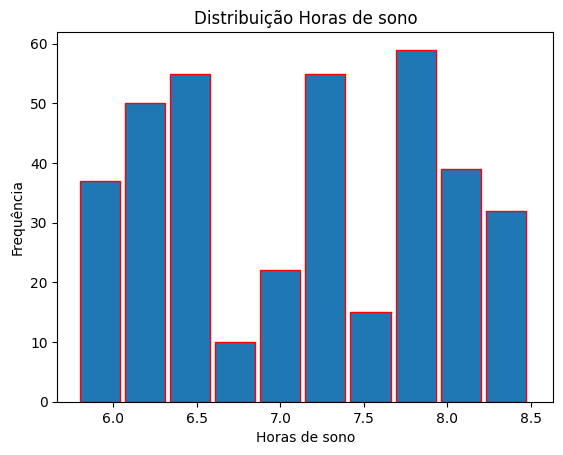

In [49]:
dados = df['Sleep Duration']
plt.hist(dados, edgecolor='red', width = 0.24)
plt.ylabel('Frequência')
plt.xlabel('Horas de sono')
plt.title('Distribuição Horas de sono')
#df['Sleep Duration'].value_counts()

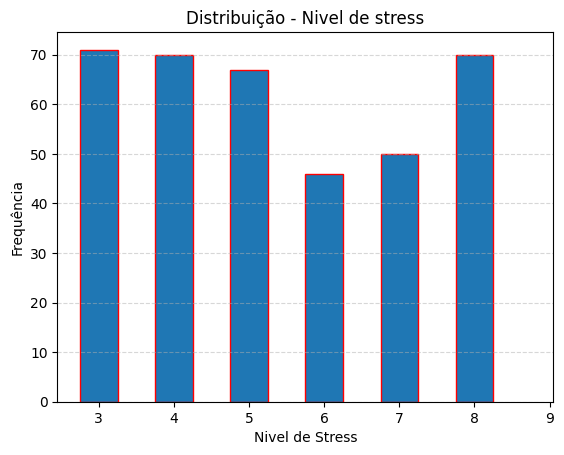

In [47]:
dados = df['Stress Level']
pontos = np.arange(min(dados)-0.25, max(dados) + 1.5, 1)
df['Stress Level'].hist(bins=pontos, edgecolor='red', width = 0.5)
plt.ylabel('Frequência')
plt.xlabel('Nivel de Stress')
plt.title('Distribuição - Nivel de stress')
plt.grid(axis='x')
plt.grid(axis='y', linestyle = '--', alpha = 0.5)


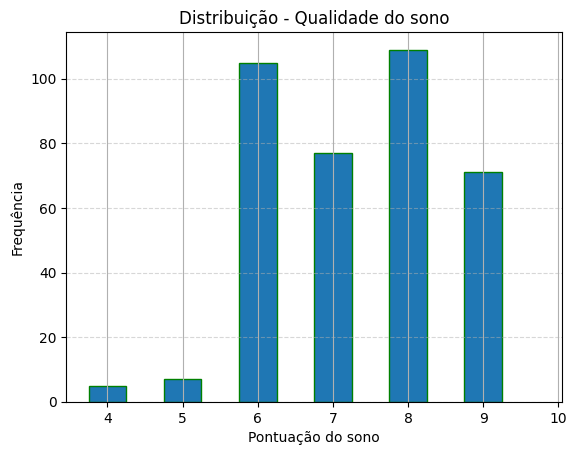

In [50]:
dados = df['Quality of Sleep']
pontos = np.arange(min(dados)-0.25, max(dados) + 1.5, 1)
plt.hist(dados, bins=pontos, edgecolor='green', width = 0.5)
plt.ylabel('Frequência')
plt.xlabel('Pontuação do sono')
plt.title('Distribuição - Qualidade do sono')
plt.grid(axis='x')
plt.grid(axis='y', linestyle = '--', alpha = 0.5)

In [28]:
media = df['Sleep Duration'].mean()
desvio_padrao = df['Sleep Duration'].std()

rv = stats.norm(media, desvio_padrao)

df['Sleep Duration Z'] = (df['Sleep Duration'] - media) / desvio_padrao
df['Sleep Duration Prob'] = rv.pdf(df['Sleep Duration Z'])


array([[<Axes: title={'center': 'Sleep Duration Z'}>]], dtype=object)

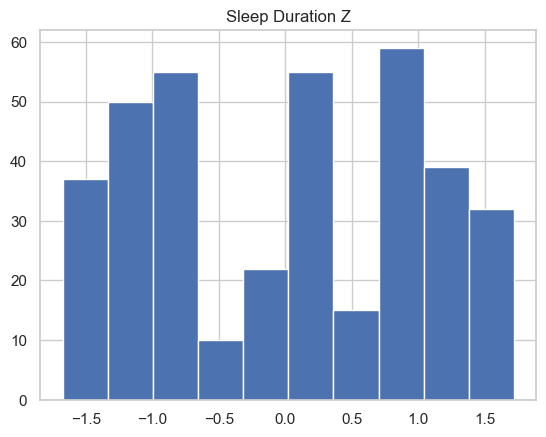

In [29]:
df[['Sleep Duration Z']].hist()

In [30]:
tempo_dormir = 5

display(df[['Sleep Duration', 'Sleep Duration Prob']].head(15))
print('P(X > 5) = ', df[df['Sleep Duration'] > tempo_dormir]['Sleep Duration Prob'].sum())

,Sleep Duration,Sleep Duration Prob
0,6.1,2.132354e-25
1,6.2,1.122557e-24
2,6.2,1.122557e-24
3,5.9,7.139249e-27
4,5.9,7.139249e-27
5,5.9,7.139249e-27
6,6.3,5.763958e-24
7,7.8,1.312360e-14
8,7.8,1.312360e-14
9,7.8,1.312360e-14


P(X > 5) =  8.448240847645785e-10


In [31]:
media = df['Sleep Duration'].mean()
desvio_padrao = df['Sleep Duration'].std()

(5 - media) / desvio_padrao

-2.6796550305216638

In [32]:
media = df['Sleep Duration'].mean()
desvio_padrao = df['Sleep Duration'].std()


z = (tempo_dormir - media)/desvio_padrao

stats.norm(media, desvio_padrao).pdf(z)

4.773367539154422e-34

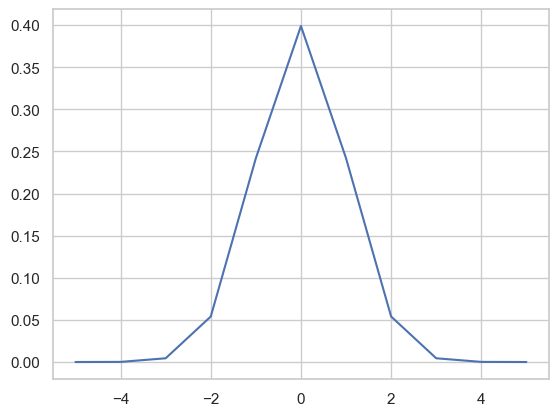

In [33]:
# Distribuição teorica
media = df['Sleep Duration Z'].mean()
desvio_padrao = df['Sleep Duration Z'].std()

rv = stats.norm(media, desvio_padrao)

x = range(-5, 6)
y = rv.pdf(x)

plt.plot(x, y)
plt.show()

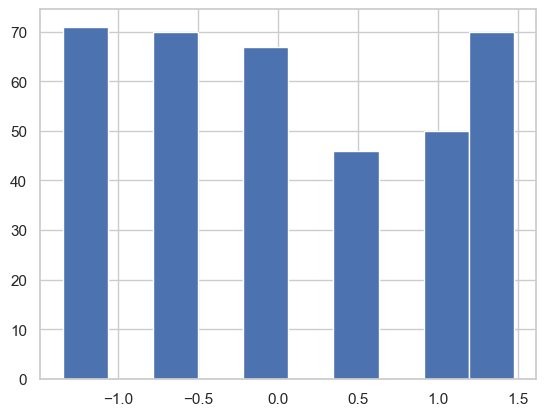

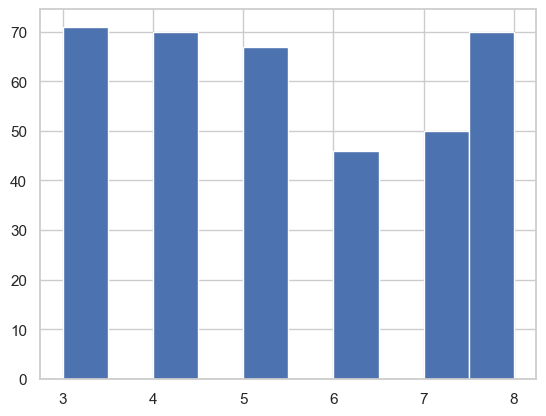

In [34]:
media = df['Stress Level'].mean()
desvio_padrao = df['Stress Level'].std()

rv = stats.norm(media, desvio_padrao)

df['Stress Level Z'] = (df['Stress Level'] - media) / desvio_padrao
df['Stress Level Prob'] = rv.pdf(df['Stress Level Z'])


df['Stress Level Z'].hist()
plt.show()
df['Stress Level'].hist()
plt.show()

Outliers com usando Z

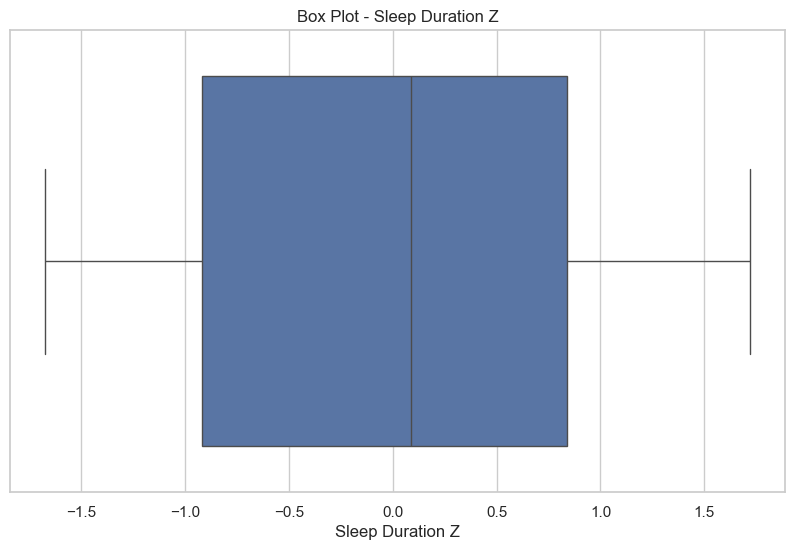

In [35]:


# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))  # Customize the figure size as needed
sns.boxplot(x=df['Sleep Duration Z'])

plt.title('Box Plot - Sleep Duration Z')
plt.show()


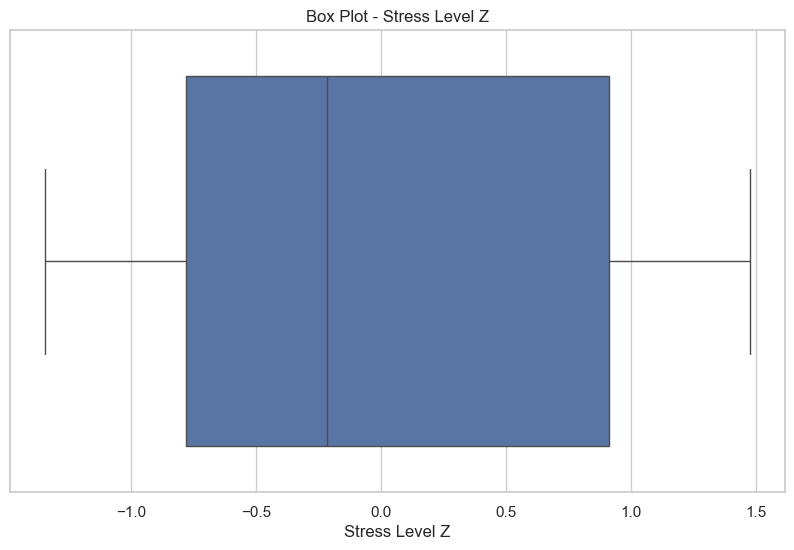

In [36]:
# Set the style of seaborn for better visuals
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(10, 6))  # Customize the figure size as needed
sns.boxplot(x=df['Stress Level Z'])

plt.title('Box Plot - Stress Level Z')
plt.show()